# How equitable is the tree coverage in Austin?
## Part 1: Datasets and Exploratory Data Analysis (EDA)

Irfana Mohamed Asif (im9858)


**Importing packages**

In [25]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from shapely.wkt import loads

## Dataset 1: City of Austin Tree Canopy 2022

Source: City of Austin
https://data.austintexas.gov/Locations-and-Maps/Tree-Canopy-2022/943x-7cq5

In [3]:
#Create GeoDataFrame with Tree Canopy Cover
gdf_tree = gpd.read_file('Tree_Canopy_2022.gdb', driver='FileGDB', layer='tree_canopy_2022')

In [4]:
# Keeping only necessary columns
gdf_tree=gdf_tree[['geometry','Shape_Area']]


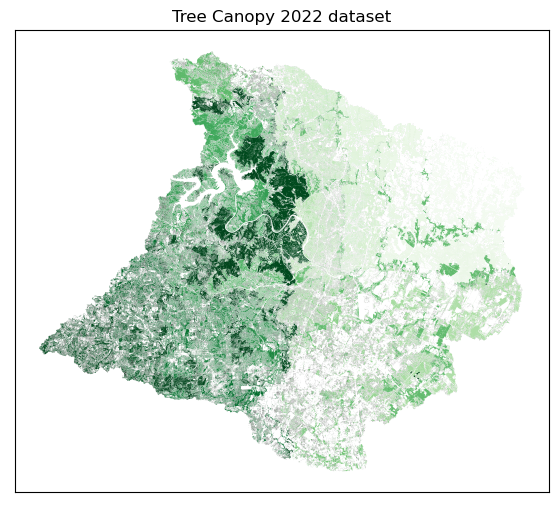

In [5]:
# Set up the plot and specify the font family as Arial
fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams['font.family'] = 'Arial'

# Plot the GeoDataFrame
gdf_tree.plot(ax=ax, cmap='Greens', legend=True)
ax.set_xticks([])
ax.set_yticks([]) 
ax.set_title('Tree Canopy 2022 dataset')

#plt.savefig('Tree Canopy dataset', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## Dataset 2: City of Austin 2020 Census tract geometries 

Source: https://demographics-austin.hub.arcgis.com/datasets/austin::census-2020-redistricting-tract-data/explore

In [6]:
#Create GeoDataFrame with census tracts boundaries
gdf_tracts = gpd.read_file('Census_2020_Redistricting_Tract_Data.gdb.zip', driver='FileGDB', layer='TractsJoin')

In [7]:
# keeping only necessary columns
gdf_tracts =gdf_tracts[['geometry','GEOID20']]

In [8]:
# Convert the Census GeoDataFrame to EPSG:2277 (Central Texas)
gdf_tracts = gdf_tracts.to_crs('EPSG:2277')

In [9]:
# Calculate area of census tracts 
gdf_tracts['Tract_Area'] = gdf_tracts['geometry'].area

## Dataset 3: Ethnicity and Race 2021 Texas by census tract

Source: https://censusreporter.org/ 

ACS 2021 5-year

Table B03002
Hispanic or Latino Origin by Race

In [10]:
#Load datset to a DataFrame
ethnicity_df=pd.read_csv('Ethnicity and race_Texas.csv')

In [12]:
#Convert object columns to numbers
ethnicity_df['White%'] = pd.to_numeric(ethnicity_df['White%'], errors='coerce')
ethnicity_df['Black%'] = pd.to_numeric(ethnicity_df['Black%'], errors='coerce')
ethnicity_df['American Indian%'] = pd.to_numeric(ethnicity_df['American Indian%'], errors='coerce')
ethnicity_df['Asian%'] = pd.to_numeric(ethnicity_df['Asian%'], errors='coerce')
ethnicity_df['Native Hawaiian%'] = pd.to_numeric(ethnicity_df['Native Hawaiian%'], errors='coerce')
ethnicity_df['Other%'] = pd.to_numeric(ethnicity_df['Other%'], errors='coerce')
ethnicity_df['Latino%'] = pd.to_numeric(ethnicity_df['Latino%'], errors='coerce')

In [13]:
# Drop NaNs 
ethnicity_df=ethnicity_df.dropna()

In [19]:
#Get dataset info
ethnicity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6852 entries, 0 to 6895
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GEOID20           6852 non-null   int64  
 1   Total             6852 non-null   int64  
 2   White             6852 non-null   int64  
 3   Black             6852 non-null   int64  
 4   American Indian   6852 non-null   int64  
 5   Asian             6852 non-null   int64  
 6   Native Hawaiian   6852 non-null   int64  
 7   Other             6852 non-null   int64  
 8   Two or More       6852 non-null   int64  
 9   Latino            6852 non-null   int64  
 10  White%            6852 non-null   float64
 11  Black%            6852 non-null   float64
 12  American Indian%  6852 non-null   float64
 13  Asian%            6852 non-null   float64
 14  Native Hawaiian%  6852 non-null   float64
 15  Other%            6852 non-null   float64
 16  Two or More%      6852 non-null   object 


In [17]:
#Get dataset statistics
ethnicity_df.describe()

,GEOID20,Total,White,Black,American Indian,Asian,Native Hawaiian,Other,Two or More,Latino,White%,Black%,American Indian%,Asian%,Native Hawaiian%,Other%,Latino%
count,6.852000e+03,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000
mean,4.822888e+10,4212.285610,1714.102744,496.459720,8.122884,209.235698,3.105954,10.598511,95.246789,1675.413310,0.416840,0.116982,0.001999,0.045872,0.000759,0.002424,0.393126
std,1.437567e+08,1974.265006,1391.212405,702.359015,24.289725,454.407484,19.859244,37.369030,124.745359,1486.612861,0.274847,0.154226,0.006198,0.084307,0.004526,0.009156,0.283724
min,4.800195e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.811302e+10,2814.750000,565.000000,47.000000,0.000000,0.000000,0.000000,0.000000,11.000000,563.750000,0.156214,0.012442,0.000000,0.000000,0.000000,0.000000,0.160435
50%,4.820142e+10,3964.000000,1469.000000,219.500000,0.000000,46.000000,0.000000,0.000000,57.000000,1219.500000,0.420343,0.058766,0.000000,0.012024,0.000000,0.000000,0.307502
75%,4.835500e+10,5207.250000,2536.000000,662.000000,5.000000,217.000000,0.000000,0.000000,132.000000,2410.000000,0.646766,0.159191,0.001423,0.052688,0.000000,0.000000,0.596300
max,4.850795e+10,27839.000000,11850.000000,6800.000000,808.000000,9745.000000,574.000000,892.000000,1871.000000,16223.000000,1.000000,0.967516,0.197991,1.000000,0.099953,0.387848,1.000000


## Dataset 4: Median Household Income data 2021 Texas by Tract

Source: https://data.census.gov/

ACS 2021 5-year 
Table B19013_001E

Annual Median Household Income 
(in 2021 inflation-adjusted dollars)


In [16]:
#Load datset to a DataFrame
income_df=pd.read_excel('HHI 2021.xlsx')

In [20]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23797 entries, 0 to 23796
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   GEOID20     23797 non-null  int64
 1   Median HHI  23797 non-null  int64
dtypes: int64(2)
memory usage: 372.0 KB


In [22]:
income_df.describe()

,GEOID20,Median HHI
count,2.379700e+04,23797.000000
mean,3.584514e+11,73987.586166
std,1.960051e+11,40900.516982
min,4.800195e+10,2500.000000
25%,4.843912e+10,45781.000000
50%,4.812102e+11,64219.000000
75%,4.824995e+11,90973.000000
max,4.850795e+11,250000.000000


## Dataset 5: Impervious Cover 2021

Source: City of Austin

https://data.austintexas.gov/Building-and-Development/Impervious-Cover-2021/3ya2-4qw9

In [24]:
# Create a DataFrame from the CSV file
Imperv_df = pd.read_csv('Impervious_Cover_2021.csv')

In [28]:
# Transforming polygon columns of Imperv_df
Imperv_df['geometry'] = Imperv_df['polygon'].apply(lambda x: loads(x))

# Create a GeoDataFrame from the DataFrame
Imperv_gdf = gpd.GeoDataFrame(Imperv_df, geometry='geometry')

# Drop the original 'polygon' column if needed
Imperv_gdf = Imperv_gdf.drop(columns=['polygon'])


In [49]:
# Calculating area of impervious cover in EPSG:2277 (sqft)
Imperv_gdf.crs = 'EPSG:4326'
Imperv_gdf = Imperv_gdf.to_crs(epsg=2277)
Imperv_gdf['area_sqft'] = Imperv_gdf['geometry'].area

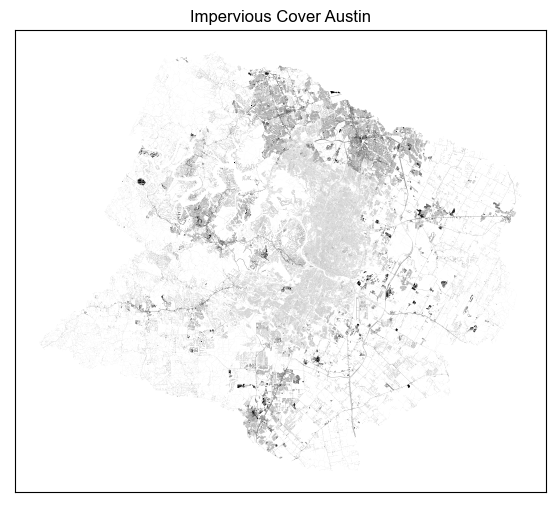

In [42]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 6))
Imperv_gdf.plot(ax=ax, cmap='Greys', legend=True)
ax.set_xticks([])
ax.set_yticks([]) 

# Customize other plot settings if needed
ax.set_title('Impervious Cover Austin')
#plt.savefig('Impervious Cover', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [47]:
#Keeping only necessary columns 
Imperv_gdf=Imperv_gdf[['geometry','area_sqft']]

# Merging datasets 

## 1. Tree canopy and census tracts geometries 

In [33]:
# Spatial join for GeoDataFrames of trees and tracts

gdf_tree_tracts=gpd.sjoin(gdf_tree,gdf_tracts,how='inner')

In [34]:
#display spatial join 
gdf_tree_tracts.head()

,geometry,Shape_Area,index_right,GEOID20,Tract_Area
0,"MULTIPOLYGON (((3232167.893 10124390.402, 3232...",34.319618,483,48021950102,2.043855e+09
1,"MULTIPOLYGON (((3232252.100 10124560.874, 3232...",8.882639,483,48021950102,2.043855e+09
2,"MULTIPOLYGON (((3232367.716 10124561.235, 3232...",33.059909,483,48021950102,2.043855e+09
3,"MULTIPOLYGON (((3232387.635 10124529.226, 3232...",16.820616,483,48021950102,2.043855e+09
4,"MULTIPOLYGON (((3232409.823 10124478.184, 3232...",12.694549,483,48021950102,2.043855e+09


In [35]:
#Grouping all the data points by tract ('GEOID20')
grouped_tree_tracts = gdf_tree_tracts.groupby('GEOID20').agg({
    'Tract_Area': 'mean',
    'Shape_Area': 'sum'
}).reset_index()


In [36]:
# Canopy tree % cover calculation 
grouped_tree_tracts['Canopy %']=grouped_tree_tracts['Shape_Area']/grouped_tree_tracts['Tract_Area']*100

In [37]:
# add geometry column to grouped_tree_tracts
grouped_tree_tracts=pd.merge(grouped_tree_tracts,gdf_tracts, on='GEOID20', how='inner')

In [38]:
# replacing values higher than 100 by 100
grouped_tree_tracts['Canopy %'] = np.where(grouped_tree_tracts['Canopy %']> 100, 100, grouped_tree_tracts['Canopy %'])

In [39]:
#converting DataFrame to GeoDataFrame
grouped_tree_tracts = gpd.GeoDataFrame(grouped_tree_tracts)

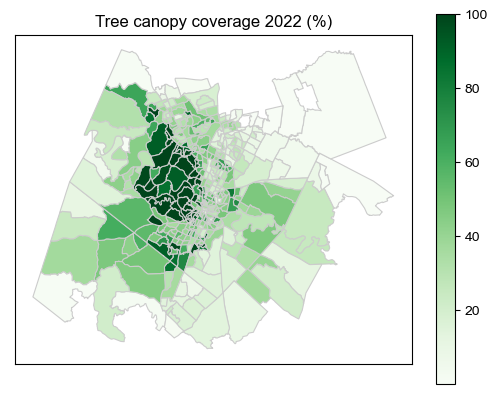

In [40]:
#Plot merged dataset 

ax=grouped_tree_tracts.plot(column='Canopy %', legend=True, cmap='Greens',linewidth=0.8, edgecolor='0.8')
ax.set_xticks([])
ax.set_yticks([]) 
ax.set_title('Tree canopy coverage 2022 (%)')
#plt.savefig('Tree Canopy', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
grouped_tree_tracts=grouped_tree_tracts.drop(columns='Tract_Area_y')

In [44]:
grouped_tree_tracts.columns=['GEOID20','Tract_Area','Canopy_Area','Canopy%','geometry']

In [45]:
grouped_tree_tracts.head()

,GEOID20,Tract_Area,Canopy_Area,Canopy%,geometry
0,48021950101,2.203567e+09,5.563207e+08,25.246376,"MULTIPOLYGON (((3194259.201 10052446.255, 3194..."
1,48021950102,2.043855e+09,1.035976e+06,0.050687,"MULTIPOLYGON (((3226561.026 10120397.363, 3226..."
2,48021950201,1.610528e+08,6.316777e+05,0.392218,"MULTIPOLYGON (((3229627.412 10107750.717, 3229..."
3,48021950202,2.382433e+08,2.062106e+07,8.655465,"MULTIPOLYGON (((3217373.514 10101088.130, 3217..."
4,48021950301,9.299677e+08,2.413357e+08,25.950978,"MULTIPOLYGON (((3182589.056 10039151.474, 3182..."


In [56]:
grouped_tree_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GEOID20      407 non-null    object  
 1   Tract_Area   407 non-null    float64 
 2   Canopy_Area  407 non-null    float64 
 3   Canopy%      407 non-null    float64 
 4   geometry     407 non-null    geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 19.1+ KB


In [59]:
#Convert GEOID20 to numeric 
grouped_tree_tracts['GEOID20'] = pd.to_numeric(grouped_tree_tracts['GEOID20'], errors='coerce')

## 2. Impervious cover and census tracts geometries 

In [50]:
Imperv_gdf_tract=Imperv_gdf.sjoin(gdf_tracts, how="inner")

In [54]:
#Grouping all the data points by tract ('GEOID20')
Imperv_gdf_tract= Imperv_gdf_tract.groupby('GEOID20').agg({
    'area_sqft': 'sum'}).reset_index()
Imperv_gdf_tract.columns=['GEOID20','Imper.Area']

In [55]:
Imperv_gdf_tract.head()

,GEOID20,Imper.Area
0,48021950101,4.514139e+07
1,48021950102,2.582453e+06
2,48021950201,3.895667e+06
3,48021950202,2.321229e+07
4,48021950301,2.828050e+07


In [64]:
Imperv_gdf_tract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GEOID20     410 non-null    object 
 1   Imper.Area  410 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.5+ KB


In [65]:
#Convert GEOID20 to numeric 
Imperv_gdf_tract['GEOID20'] = pd.to_numeric(Imperv_gdf_tract['GEOID20'], errors='coerce')

## 3. Merging Tree cover GeoDataFrame with Race & Ethinictity, Impervious cover and Median Household Income by GEOID20

In [60]:
#Merge with Race and Ethnicity
gdf = grouped_tree_tracts.merge(ethnicity_df, on='GEOID20')

In [61]:
# Merge with Median Household Income
gdf = gdf.merge(income_df, on='GEOID20')

In [66]:
#Merge with impervious cover
gdf = gdf.merge(Imperv_gdf_tract, on='GEOID20')

In [67]:
# Calculate % of impervous cover by area of census tract
gdf['Imperv%']=gdf['Imper.Area']/gdf['Tract_Area']

In [69]:
gdf.head()

,GEOID20,Tract_Area,Canopy_Area,Canopy%,geometry,Total,White,Black,American Indian,Asian,...,Black%,American Indian%,Asian%,Native Hawaiian%,Other%,Two or More%,Latino%,Median HHI,Imper.Area,Imperv%
0,48021950101,2.203567e+09,5.563207e+08,25.246376,"MULTIPOLYGON (((3194259.201 10052446.255, 3194...",6330,3373,166,0,36,...,0.026224,0.0,0.005687,0.0,0.009163,0.117535545,0.308531,90498,4.514139e+07,0.020486
1,48021950102,2.043855e+09,1.035976e+06,0.050687,"MULTIPOLYGON (((3226561.026 10120397.363, 3226...",4221,2779,21,0,5,...,0.004975,0.0,0.001185,0.0,0.000000,0.020374319,0.315091,92207,2.582453e+06,0.001264
2,48021950201,1.610528e+08,6.316777e+05,0.392218,"MULTIPOLYGON (((3229627.412 10107750.717, 3229...",2818,699,1081,0,6,...,0.383605,0.0,0.002129,0.0,0.000000,0.004613201,0.361604,60602,3.895667e+06,0.024189
3,48021950202,2.382433e+08,2.062106e+07,8.655465,"MULTIPOLYGON (((3217373.514 10101088.130, 3217...",5862,2321,1069,0,19,...,0.182361,0.0,0.003241,0.0,0.000000,0.00017059,0.418287,95333,2.321229e+07,0.097431
4,48021950301,9.299677e+08,2.413357e+08,25.950978,"MULTIPOLYGON (((3182589.056 10039151.474, 3182...",5548,3053,464,0,223,...,0.083634,0.0,0.040195,0.0,0.000000,0.036409517,0.289474,112775,2.828050e+07,0.030410


## Save GeoDataFrame as shapefile for ML analysis

In [70]:
gdf.to_file("Canopy_EDA.shp", driver="ESRI Shapefile")

C:\Users\aidaf\AppData\Local\Temp\ipykernel_23744\2178782297.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("Canopy_EDA.shp", driver="ESRI Shapefile")


## Plotting datasets 

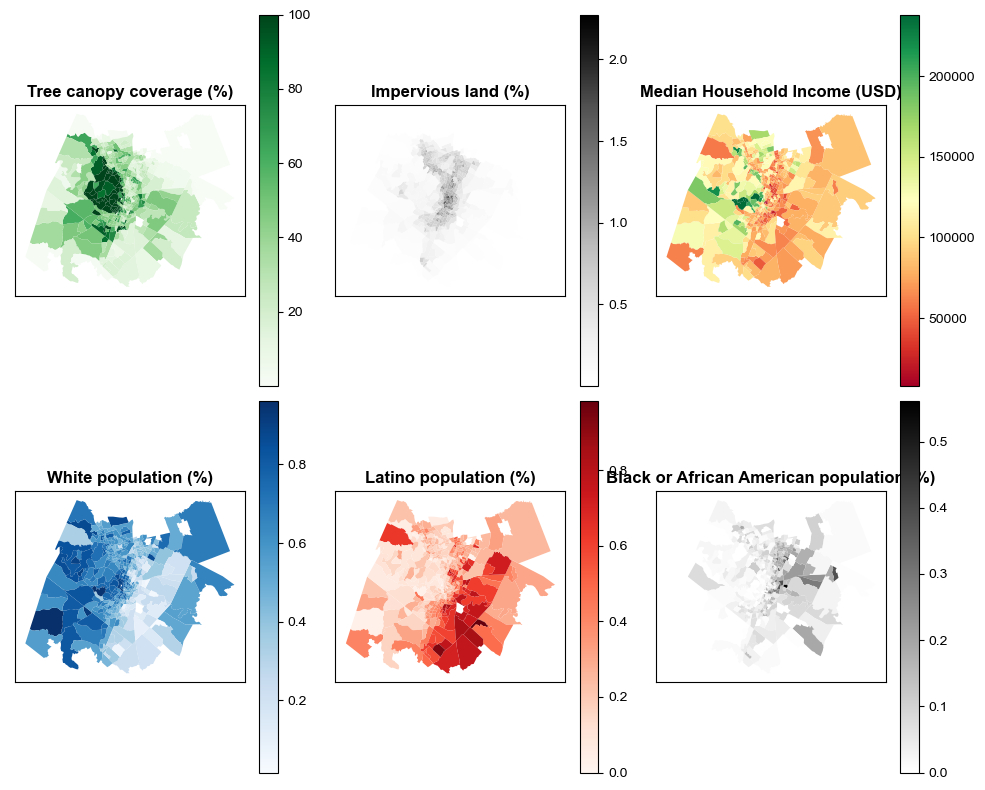

In [75]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 8),layout='tight', sharex=True)

# Plot the first variable
gdf.plot(column='Canopy%', ax=axs[0, 0], legend=True, cmap='Greens')

# Plot the second variable
gdf.plot(column='Imperv%', ax=axs[0, 1], legend=True, cmap='Greys')

# Plot the third variable
gdf.plot(column='Median HHI', ax=axs[0, 2], legend=True, cmap='RdYlGn')

# Plot the fourth variable
gdf.plot(column='White%', ax=axs[1, 0], legend=True, cmap='Blues')

# Plot the fifth variable
gdf.plot(column='Latino%', ax=axs[1, 1], legend=True, cmap='Reds')


# Plot the fifth variable
gdf.plot(column='Black%', ax=axs[1, 2], legend=True, cmap='binary')

# Add titles to subplots
axs[0, 0].set_title('Tree canopy coverage (%)')
axs[0, 1].set_title('Impervious land (%)')
axs[0, 2].set_title('Median Household Income (USD)')
axs[1, 0].set_title('White population (%)')
axs[1, 1].set_title('Latino population (%)')
axs[1, 2].set_title('Black or African American population (%)')


# Adjust layout
plt.tight_layout()

for ax in axs.flat:
    ax.set_title(ax.get_title(), fontdict={'family': 'Arial', 'weight': 'bold'})
        # Hide x and y ticks
    ax.set_xticks([])
    ax.set_yticks([]) 

# Show the plot
plt.show()

## Exploring correlation between variables 

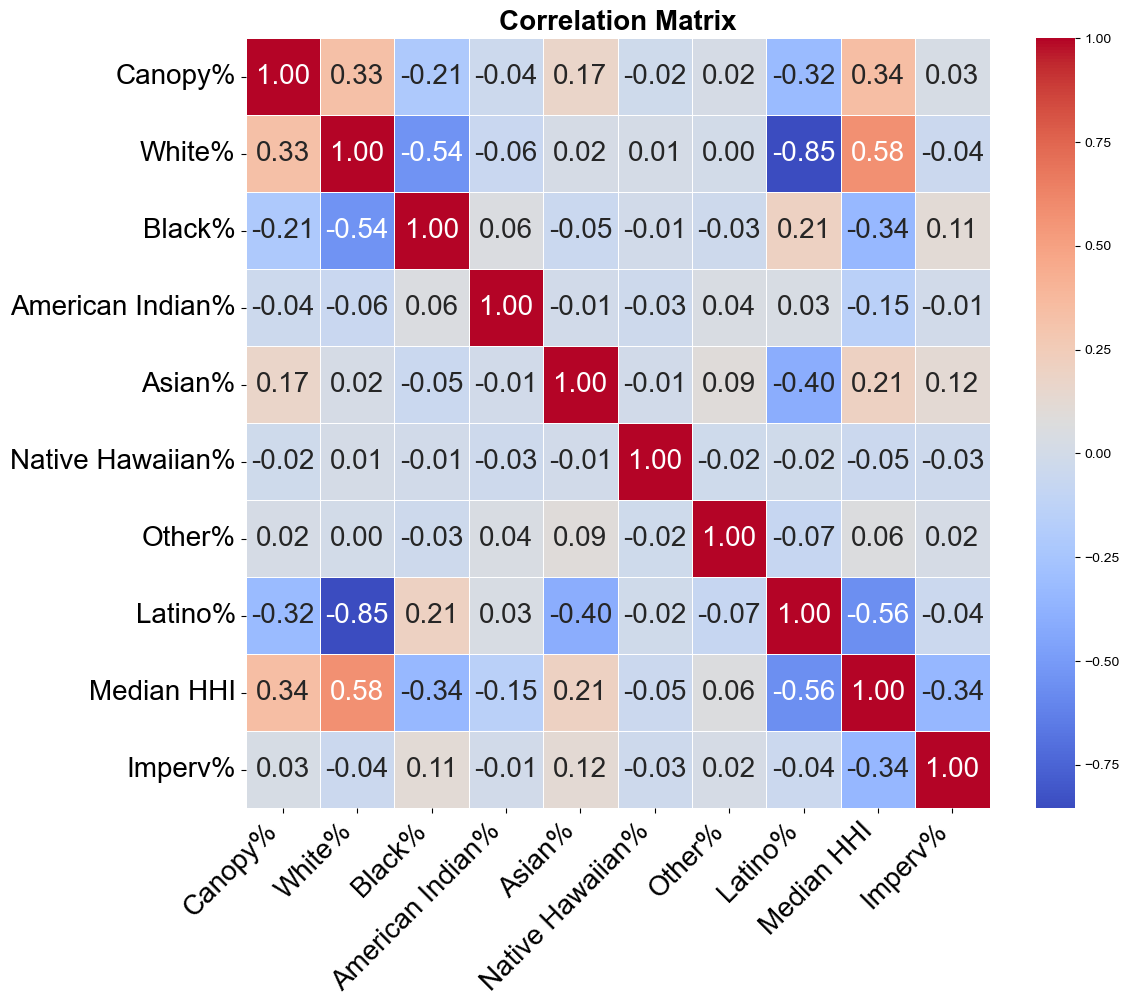

In [73]:
# Calculate the correlation matrix
correlation_matrix = gdf.drop(columns=['GEOID20','Tract_Area', 'Canopy_Area','geometry', 'Total',
       'White', 'Black', 'American Indian', 'Asian ', 'Native Hawaiian ',
       'Other', 'Two or More ', 'Latino','Imper.Area']).corr()


# Create a heatmap with adjusted color bar width
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 20})


# Break variable names into multiple lines
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right',fontsize=20)

plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.savefig('Correlation Matrix', dpi=300, bbox_inches='tight')
plt.show()
